In [1]:
# import library
import numpy as np 
import pandas as pd
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Load & understand data

In [4]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (3)\fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


* total 22 attribute, 2126 observations, with no missing value
* all data type are in float/numeric

Feature description ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6822315/)):
1. baseline value: Fetal heart rate baseline (beats per minute)
2. accelerations: Number of accelerations per second
3. fetal_movement: Number of fetal movements per second
4. uterine_contractions: Number of uterine contractions per second
5. light_decelerations: Number of light decelerations per second
6. severe_decelerations: Number of severe decelerations per second
7. prolongued_decelerations: Number of prolonged decelerations per second
8. abnormal_short_term_variability: Percentage of time with abnormal short-term variability
9. mean_value_of_short_term_variability: Mean value of short-term variability
10. percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long-term variability
11. mean_value_of_long_term_variability: Mean value of long-term variability
12. histogram_width: Width of FHR histogram
13. histogram_min: Minimum of FHR histogram
14. histogram_max: Maximum of FHR histogram
15. histogram_number_of_peaks: Number of FHR histogram peaks
16. histogram_number_of_zeroes: Number of FHR histogram zeroes
17. histogram_mode: FHR histogram mode
18. histogram_mean: FHR histogram mean
19. histogram_median: FHR histogram median
20. histogram_variance: FHR histogram variance
21. histogram_tendency: FHR histogram tendency
22. fetal_health: Fetal state class code (1=Normal, 2=Suspected, 3=Pathological)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## Pre-process data

### Handling missing value

In [7]:
# detect missing value if any
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

no missing values

### Handling duplicated rows

In [8]:
# check shape before drop
df.shape

(2126, 22)

In [9]:
# drop duplicated row
df = df.drop_duplicates()

# check shape after drop
df.shape

(2113, 22)

13 rows duplicated and is removed from df

### Handling outlier

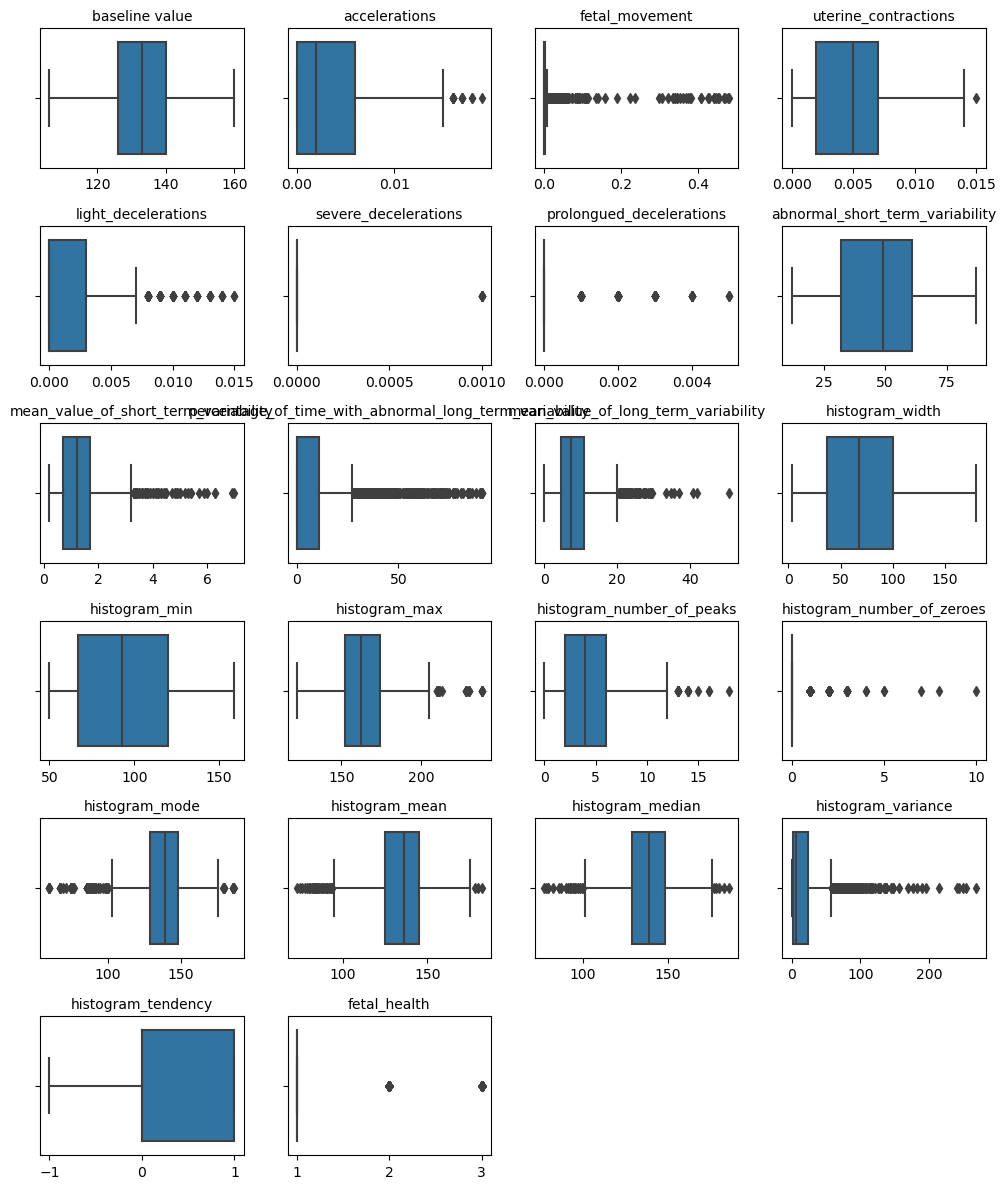

In [10]:
# Handling outlier for numeric attributes 
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(6, 4, figsize=(10, 12))
axes = axes.flatten()
    
# Create a boxplot for each continuous variable
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"{column}", fontsize=10)
    axes[i].set_xlabel("")  # Remove x-axis title

# Remove empty subplot
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

It can be observed that several attributes exhibit outliers based on the boxplots. However, given that the dataset was examined and interpreted by three expert obstetricians, it is believed that these outliers on the boxplots may not be outliers in the actual clinical context. Instead, they could be indicative of various factors, such as signals of fetal distress, maternal conditions etc. 

No action will be taken on these values that out of boxplot range.

## EDA

## Label encoding

In [11]:
# Convert target variable to discrete/interger
df['fetal_health'] = df['fetal_health'].astype(int)

### Data Splitting
70-30 split

In [12]:
df_features = df.drop(['fetal_health'], axis=1)
df_target = df['fetal_health']

# split df at 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=123)

### Data Transformation
* Conducted on train_set and test_set separately
* Scaling and normalization is performed, by scaling all the continuous variables into a common scale to ease the comparison between variables with various units and ranges
* All features will be transformed since all are numerical data
* Formula employed: x=(x−mean)/stdev

In [13]:
# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the train_set & test_set, features only
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [14]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns = X_train.columns, index=X_train.index)
scaled_X_train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
468,0.703704,0.000000,0.004158,0.133333,0.000000,0.0,0.0,0.960000,0.014706,0.373626,...,0.197740,0.759259,0.413793,0.111111,0.0,0.666667,0.642202,0.620370,0.000000,0.0
1143,0.296296,0.222222,0.000000,0.400000,0.400000,0.0,0.0,0.120000,0.220588,0.000000,...,0.372881,0.222222,0.181034,0.222222,0.0,0.579365,0.440367,0.444444,0.118959,1.0
162,0.296296,0.222222,0.000000,0.400000,0.066667,0.0,0.0,0.266667,0.147059,0.109890,...,0.440678,0.157407,0.224138,0.111111,0.0,0.515873,0.467890,0.444444,0.029740,1.0
919,0.296296,0.000000,0.000000,0.266667,0.000000,0.0,0.0,0.360000,0.088235,0.109890,...,0.112994,0.518519,0.060345,0.055556,0.0,0.500000,0.422018,0.398148,0.007435,0.5
1103,0.296296,0.388889,0.000000,0.200000,0.000000,0.0,0.0,0.093333,0.308824,0.000000,...,0.282486,0.500000,0.301724,0.111111,0.1,0.515873,0.495413,0.462963,0.029740,0.5


In [15]:
scaled_X_test = pd.DataFrame(scaled_X_test, columns = X_test.columns, index=X_test.index)
scaled_X_test.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1542,0.716981,0.157895,0.000000,0.571429,0.0,0.0,0.0,0.507042,0.074627,0.065934,...,0.254335,0.642202,0.382609,0.1875,0.0,0.692913,0.737374,0.722772,0.012,0.5
753,0.452830,0.000000,0.002096,0.000000,0.0,0.0,0.0,0.619718,0.044776,0.362637,...,0.092486,0.688073,0.182609,0.1250,0.0,0.543307,0.555556,0.544554,0.008,0.0
454,0.509434,0.000000,0.006289,0.214286,0.0,0.0,0.0,0.647887,0.044776,0.186813,...,0.109827,0.688073,0.208696,0.1250,0.0,0.598425,0.606061,0.594059,0.004,0.5
534,0.584906,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.718310,0.044776,0.395604,...,0.537572,0.192661,0.382609,0.1875,0.0,0.653543,0.656566,0.653465,0.004,1.0
599,0.792453,0.000000,0.008386,0.285714,0.0,0.0,0.0,0.887324,0.059701,0.000000,...,0.167630,0.825688,0.426087,0.0625,0.0,0.708661,0.747475,0.732673,0.000,0.0


## Modelling
Modeling algorithms considered include:
* Logistic Regression
* Decision Tree
* Random Forest
* K-Nearest Neighbours (KNN)

### Logistic Regression

In [16]:
# Logistic regression 
log_reg = LogisticRegression(random_state=123)

# Train the LR model on the train data
log_reg.fit(scaled_X_train, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(scaled_X_test)

# Calculate evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print results
print("Accuracy:", round(accuracy_lr, 3))
print("Precision:", round(precision_lr, 3))
print("Recall:", round(recall_lr, 3))
print("F1-Score:", round(f1_lr, 3))

Accuracy: 0.897
Precision: 0.897
Recall: 0.897
F1-Score: 0.896


### Decision Tree

In [17]:
# Decision tree 
d_tree = DecisionTreeClassifier(random_state=123)

# Train the DT model on the train data
d_tree.fit(scaled_X_train, y_train)

# Predict on test data
y_pred_dt = d_tree.predict(scaled_X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print results
print("Accuracy:", round(accuracy_dt, 3))
print("Precision:", round(precision_dt, 3))
print("Recall:", round(recall_dt, 3))
print("F1-Score:", round(f1_dt, 3))

Accuracy: 0.888
Precision: 0.901
Recall: 0.888
F1-Score: 0.892


### Random Forest

In [18]:
# Random forest
r_forest = RandomForestClassifier(random_state=123)

# Train the DT model on the train data
r_forest.fit(scaled_X_train, y_train)

# Predict on test data
y_pred_rf = r_forest.predict(scaled_X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print results
print("Accuracy:", round(accuracy_rf, 3))
print("Precision:", round(precision_rf, 3))
print("Recall:", round(recall_rf, 3))
print("F1-Score:", round(f1_rf, 3))

Accuracy: 0.934
Precision: 0.935
Recall: 0.934
F1-Score: 0.934


### K-Nearest Neighbours (KNN)

In [19]:
# K neighbors classifier
knn = KNeighborsClassifier()

# Train KNN on the train data
knn.fit(scaled_X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(scaled_X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Print results
print("Accuracy:", round(accuracy_knn, 3))
print("Precision:", round(precision_knn, 3))
print("Recall:", round(recall_knn, 3))
print("F1-Score:", round(f1_knn, 3))

Accuracy: 0.904
Precision: 0.898
Recall: 0.904
F1-Score: 0.898


## Evaluation

In [21]:
# Define the models and their corresponding evaluation metrics
models = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN" ]
accuracy = [ accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn]
precision = [ precision_lr, precision_dt, precision_rf, precision_knn]
recall = [ recall_lr, recall_dt, recall_rf, recall_knn]
f1_score = [ f1_lr, f1_dt, f1_rf, f1_knn]

# Create summary table in df
summary_table = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1_Score": f1_score
})
summary_table.round(3)

,Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.897,0.897,0.897,0.896
1,Decision Tree,0.888,0.901,0.888,0.892
2,Random Forest,0.934,0.935,0.934,0.934
3,KNN,0.904,0.898,0.904,0.898


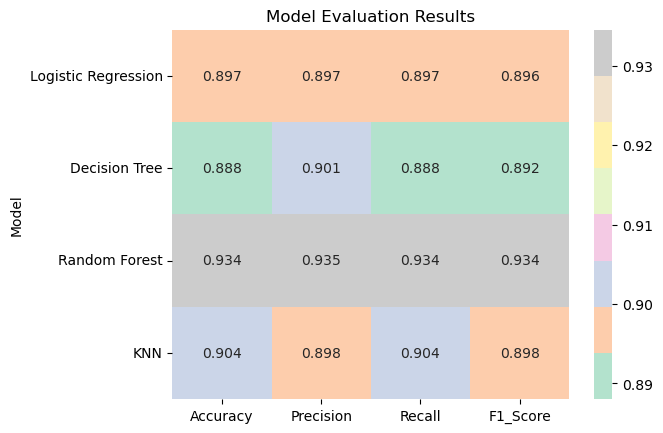

In [22]:
# Create summary table in heatmap
sns.heatmap(data=summary_table.set_index('Model').iloc[:, :], annot=True, fmt=".3f", cmap='Pastel2')
plt.title("Model Evaluation Results")
plt.show()

* As a result, Gradient Boosting Classifier has the best performance among the 7 model, follow by Random Forest Classifier. 